In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('./news_dan.json')
df['year'] = pd.to_datetime(df['date'], format='%d.%m.%Y %H:%M').dt.year

usless_words = ['что', 'это', 'для', 'как', 'так', 'и', 'в', 'над', 'к', 'до', 'не', 'на', 'но', 'за', 'то', 'с', 'ли', 'а', 'донбассе','донбасса']
colors = ['#0080ff', '#00ffff', '#00ff80']
word_frequencies_by_year = {}

In [3]:
for year, group in df.groupby('year'):
    titles = ' '.join(group['title'])
    word_tokens = word_tokenize(titles.lower())
    word_tokens = [word for word in word_tokens if (word.isalpha() and len(word) > 2) and word not in usless_words] # Remove punctuation
    word_frequencies_by_year[year] = FreqDist(word_tokens)
word_frequencies_by_year

{2015: FreqDist({'днр': 216, 'обсе': 117, 'пушилин': 58, 'боинга': 45, 'минске': 25, 'киева': 25, 'захарченко': 21, 'крушения': 21, 'хуг': 20, 'власти': 20, ...}),
 2016: FreqDist({'днр': 230, 'обсе': 129, 'пушилин': 39, 'мид': 34, 'замглавы': 32, 'захарченко': 31, 'хуг': 31, 'миссии': 31, 'минобороны': 30, 'всу': 29, ...}),
 2017: FreqDist({'днр': 256, 'обсе': 115, 'минске': 46, 'донецке': 40, 'лнр': 40, 'жителей': 38, 'смм': 36, 'всу': 32, 'под': 32, 'пушилин': 31, ...}),
 2018: FreqDist({'днр': 328, 'обсе': 81, 'минске': 64, 'мид': 47, 'всу': 45, 'пушилин': 36, 'лнр': 32, 'мккк': 28, 'сцкк': 26, 'оон': 25, ...}),
 2019: FreqDist({'днр': 279, 'мид': 83, 'обсе': 69, 'минске': 52, 'донецке': 32, 'киев': 29, 'пушилин': 29, 'киева': 28, 'разведения': 27, 'всу': 24, ...}),
 2020: FreqDist({'днр': 135, 'обсе': 49, 'мид': 26, 'киева': 24, 'унм': 22, 'никонорова': 21, 'стран': 14, 'всу': 14, 'республики': 12, 'миссии': 11, ...}),
 2021: FreqDist({'днр': 112, 'обсе': 84, 'киева': 19, 'донецке

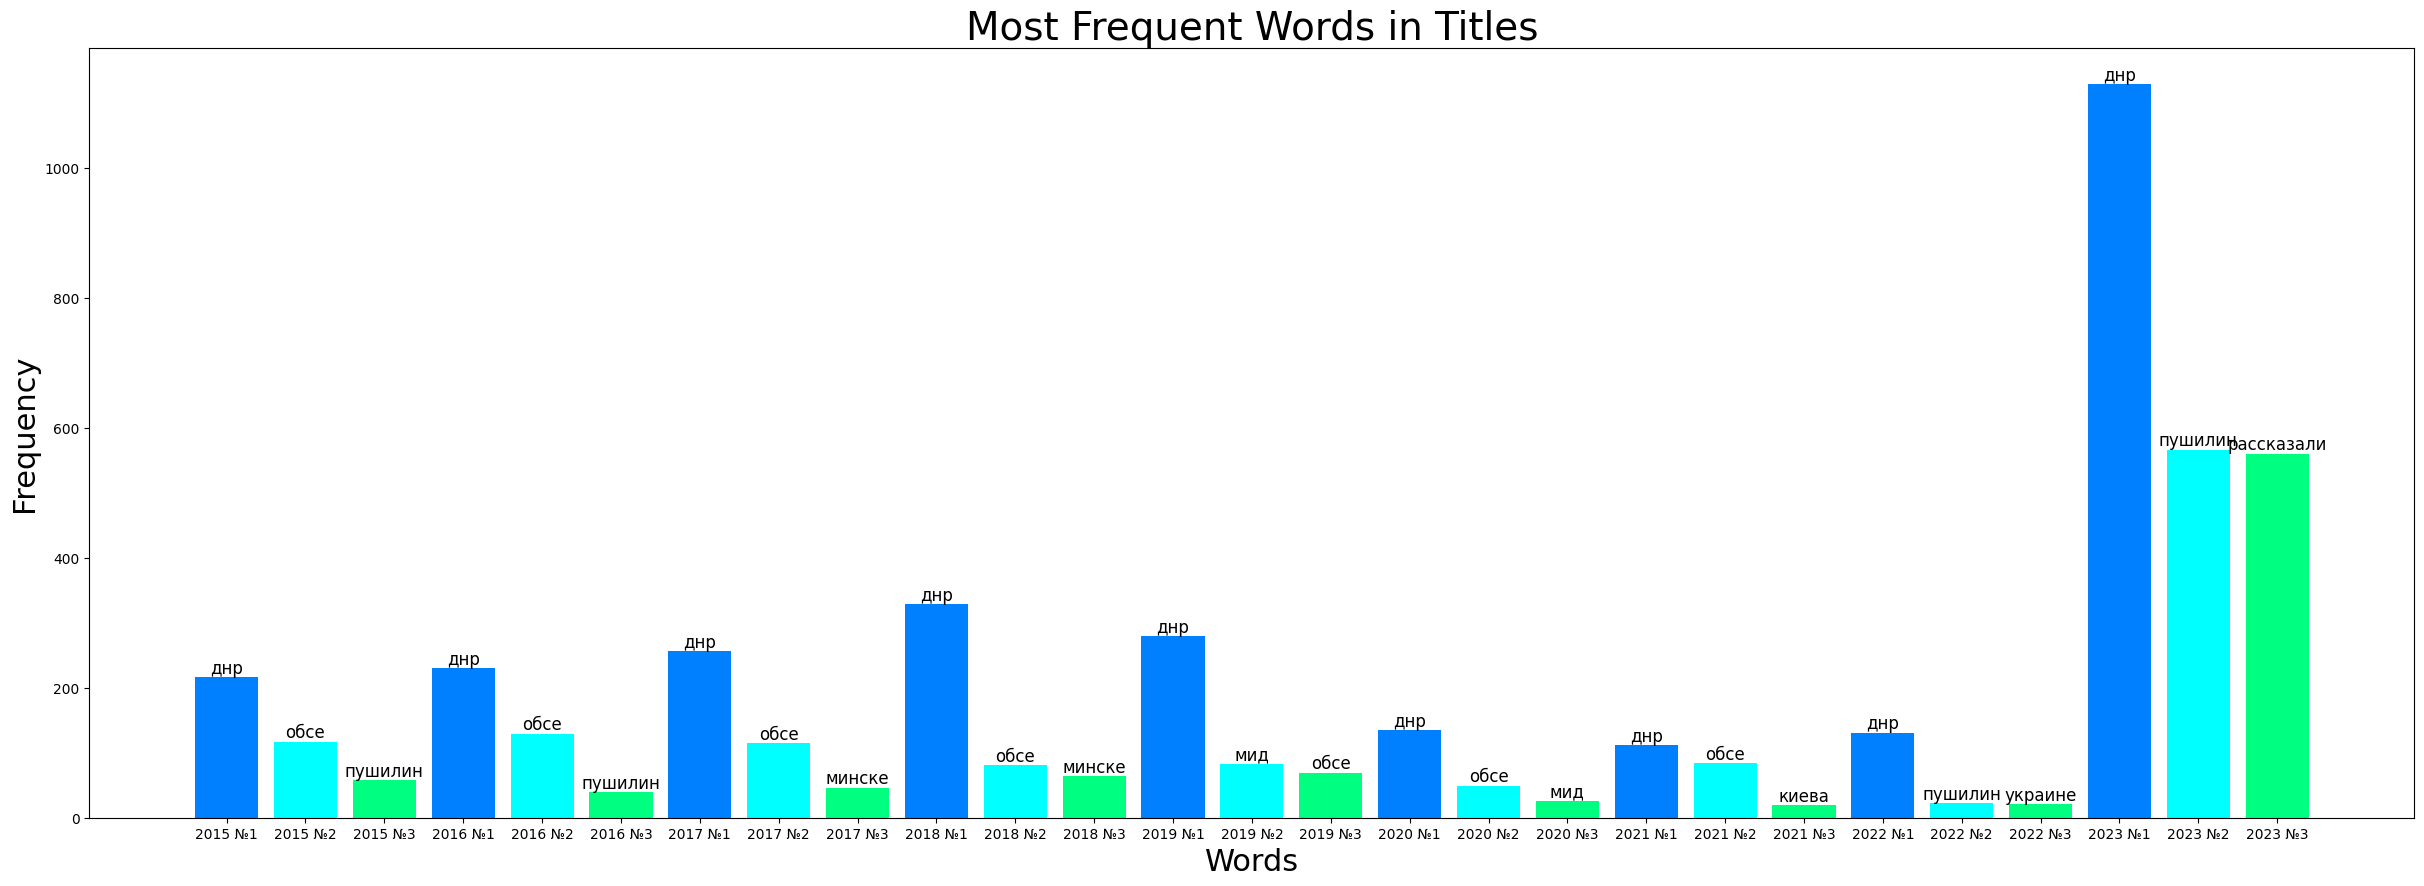

In [12]:
plt.figure(figsize=(30, 10))

for year, word_frequencies in word_frequencies_by_year.items():
    most_common_words = word_frequencies.most_common(3)
    words, frequencies = zip(*most_common_words)

    for index, word in enumerate(words):
        plt.bar(f'{year} №{index+1}', frequencies[index], color=colors[index]) 
        plt.text(f'{year} №{index+1}', frequencies[index], word, ha='center', va='bottom', fontsize=12)

plt.title("Most Frequent Words in Titles", fontsize=28)
plt.xlabel("Words", fontsize=22)
plt.ylabel("Frequency", fontsize=22)
plt.show()